In [1]:
#importing libraries
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


/opt/anaconda3/envs/p_da_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
import seaborn as sns

In [8]:
df_DA_US=df[(df['job_country']=='United States') & (df['job_title']=='Data Analyst')]

In [12]:
df_plot=df_DA_US['job_location'].value_counts().head(10).to_frame()

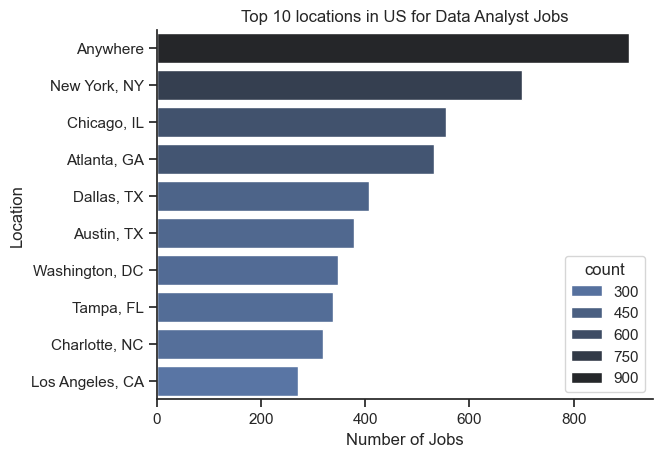

In [19]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r')
sns.despine()
plt.title('Top 10 locations in US for Data Analyst Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()


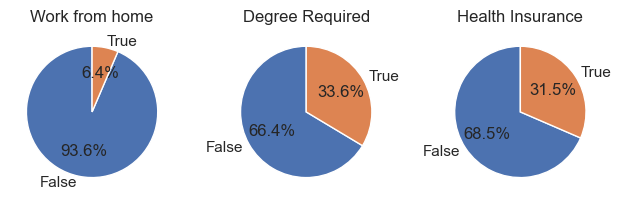

In [24]:
dict_column={
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention':'Degree Required',
    'job_health_insurance':'Health Insurance'
    }
df_boolean_columns=df_DA_US[['job_work_from_home','job_no_degree_mention','job_health_insurance']]
fig,ax=plt.subplots(1,3)
for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_boolean_columns[column].value_counts(),startangle=90,autopct='%1.1f%%',labels=['False','True'])
    ax[i].set_title(title)
plt.tight_layout()
plt.show()